In [16]:
import z3 as z3

import yaml

import networkx as nx
import matplotlib.pyplot as plt

import re

### Elements and Attributes

In [17]:
# Import metamodel
with open('./assets/doml_meta_v2.1.yaml', 'r') as raw_meta_model:
    metamodel = yaml.safe_load(raw_meta_model)

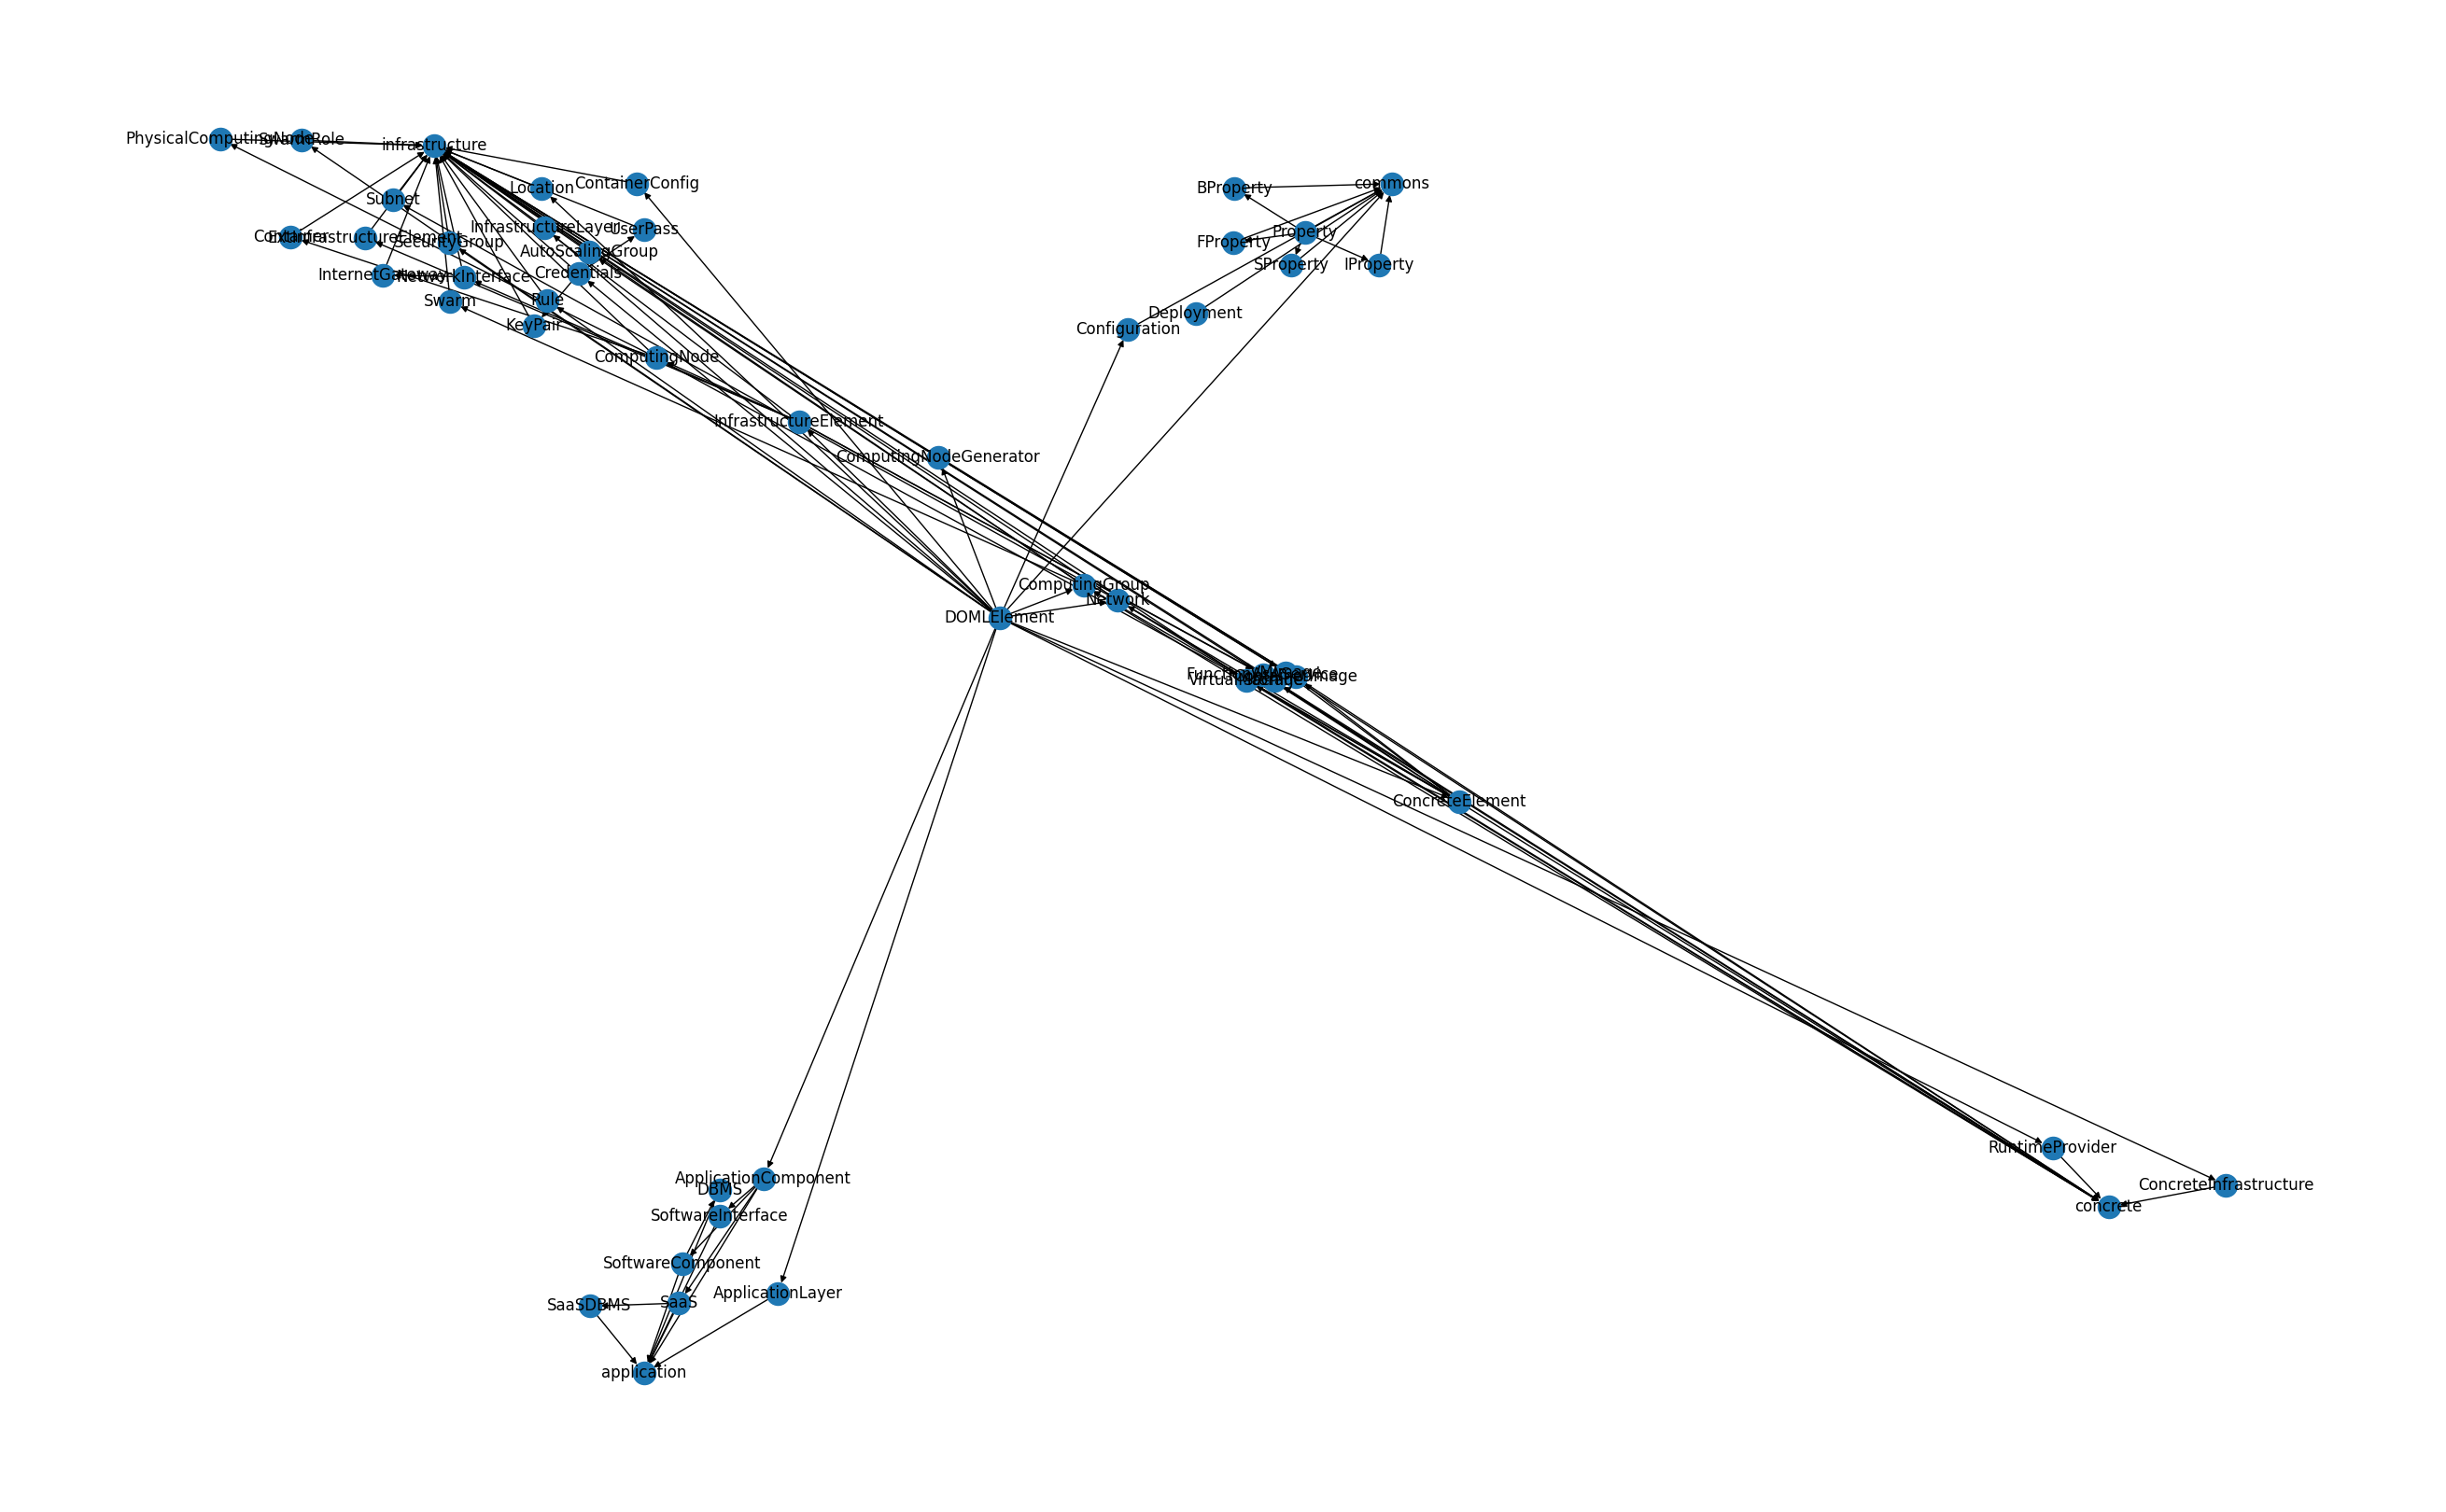

In [18]:
E = nx.DiGraph()

for cat_k, cat_v in metamodel.items():
    # print(cat_k)
    E.add_node(cat_k, type='category')
    for elem_k, elem_v in cat_v.items():
        # print('\t', elem_k)
        E.add_node(elem_k, type='element')
        E.add_edge(elem_k, cat_k, type='package')

        # print('\t\t', elem_v.keys())
        # Add edge to superclass
        if 'superclass' in elem_v.keys():
            sc = elem_v['superclass']
            sc_matches = re.search('^(.+)_(.+)$', sc)
            E.add_edge(sc_matches.group(2), elem_k, type='superclass')
        pass

draw_opts = {
    'with_labels': True,
    'font_weight': 'normal',
    'node_shape': 'o',
    'arrows': True,
    'arrowstyle': '-|>'
}



EDGE_COLOR_MAP = {
    'package': 'red',
    'superclass': 'blue',
    'default': 'black'
}

NODE_COLOR = {
    'category': 'pink',
    'element': 'orange',
    'default': '#888'
}

NODE_SIZE = {
    'category': 8000,
    'element': 4000,
    'default': 4000
}

def get_edge_color(data):
    if (data):
        return EDGE_COLOR_MAP[data.get('type', 'default')]
    return EDGE_COLOR_MAP['default']

def get_node_data(data, source):
    if (data):
        return source[data.get('type', 'default')]
    return source['default']



def draw_graph(graph, **others):

    plt.figure(figsize=(26, 16))

    edge_color = [get_edge_color(data) for a, b, data in graph.edges(data=True)]
    node_color = [get_node_data(data, NODE_COLOR) for n, data in graph.nodes(data=True)]
    node_size = [get_node_data(data, NODE_SIZE) for n, data in graph.nodes(data=True)]

    labels = {
        n: '\n'.join(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', n)) or n 
        for n in graph.nodes()
    }

    pos = nx.nx_agraph.graphviz_layout(others.get('nodelist', graph))

    nx.draw(graph, pos, labels=labels,  node_color=node_color, node_size=node_size, **(draw_opts|others))

draw_graph(E)